In [1]:
import numpy as np
import scipy.signal as signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
import os

sys.path.insert(0, '../sources')

from ENF_frequency_phase_estimation import phase_estimation_DFT1,  phase_estimation_DFT1, segmented_freq_estimation_DFT0, hilbert_instantaneous_freq, scipy_IF_estimation, segmented_freq_estimation_DFT1
from ENF_preprocessing import generate_s_tone, list_files_in_directory, downsampling, bandpass_filter
from ENF_Enhancement import RFA, VariationalModeDecomposition
from PDF_and_Plot import to_pdf

import soundfile as sf
from pydub import AudioSegment
from scipy.signal import hilbert
import math
import cmath

3861649


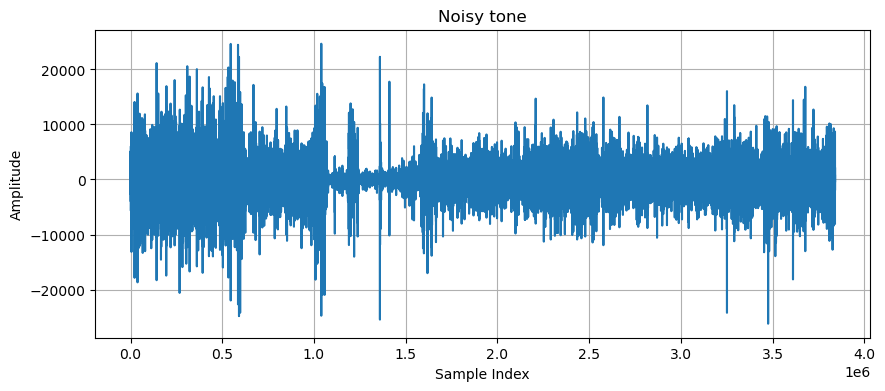

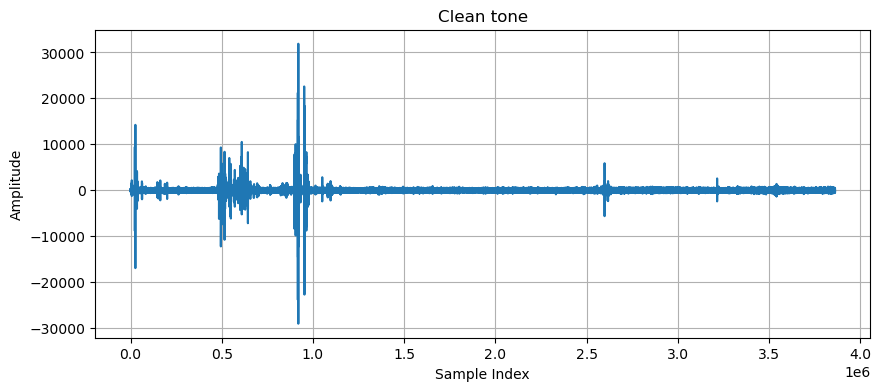

In [5]:
noise_fs, noise_data = wavfile.read('Wuhan_ENF_data/01.wav')
clean_fs, clean_data = wavfile.read('Wuhan_ENF_data/001.wav')

n_noise = np.arange(len(noise_data))
n_clean = np.arange(len(clean_data))

print(len(clean_data))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, noise_data)
plt.title('Noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(n_clean, clean_data)
plt.title('Clean tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [22]:
dir = 'Wuhan_ENF_data'
rawFile_name, downFile_name = list_files_in_directory(dir)


for i in range(len(rawFile_name)):
    downsampling(rawFile_name[i], downFile_name[i], fs_down = 1000)

Wuhan_ENF_data/down_01.wav


ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-13)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-lib

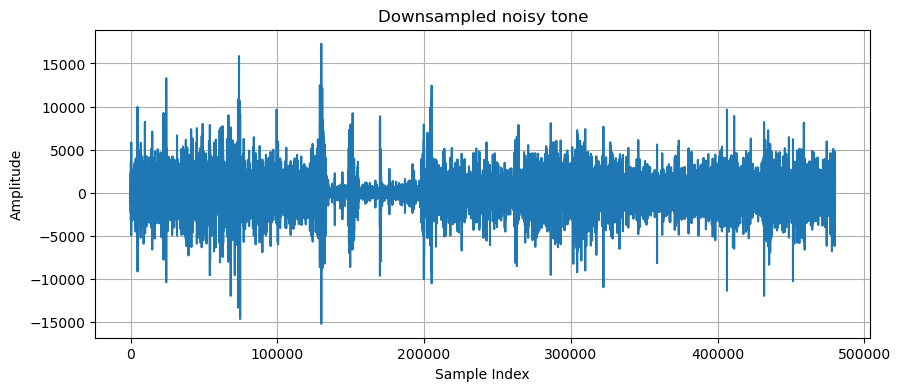

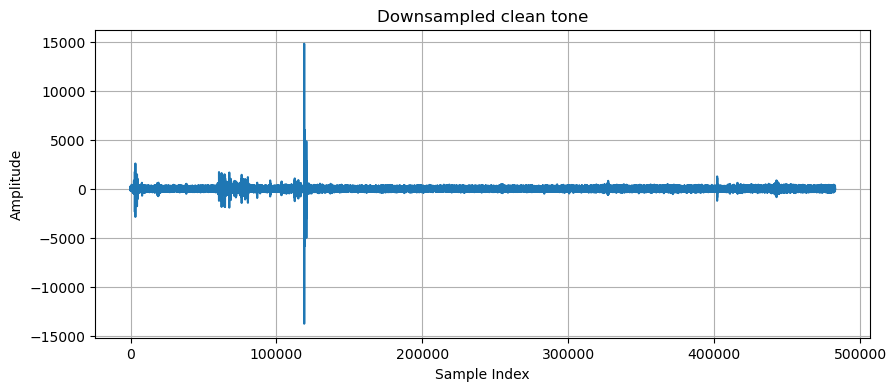

482003


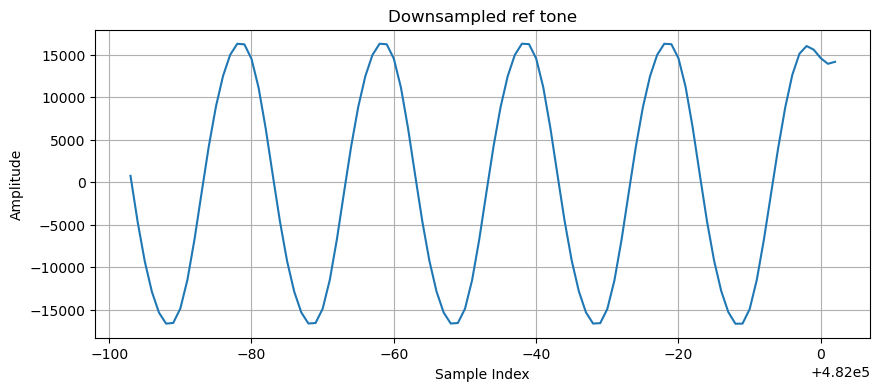

In [6]:
noise_fs, down_sig_noise = wavfile.read('Wuhan_ENF_data/down_01.wav')
clean_fs, down_sig_clean = wavfile.read('Wuhan_ENF_data/down_001.wav')
ref_fs, down_sig_ref = wavfile.read('Wuhan_ENF_data/down_001_ref.wav')

n_noise = np.arange(len(down_sig_noise))
n_clean = np.arange(len(down_sig_clean))
n_ref = np.arange(len(down_sig_ref))

#print(clean_fs)

plt.figure(figsize=(10, 4))
plt.plot(n_noise, down_sig_noise)
plt.title('Downsampled noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(n_clean, down_sig_clean)
plt.title('Downsampled clean tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

print(len(down_sig_ref))

plt.figure(figsize=(10, 4))
plt.plot(n_ref[482003-100:482003], down_sig_ref[482003-100:482003])
plt.title('Downsampled ref tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

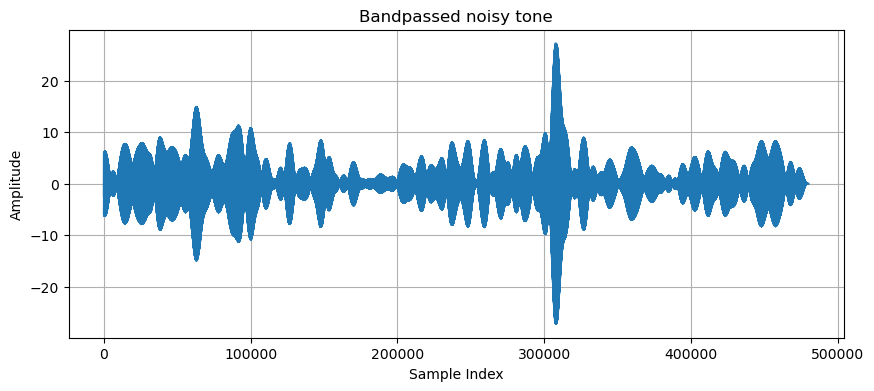

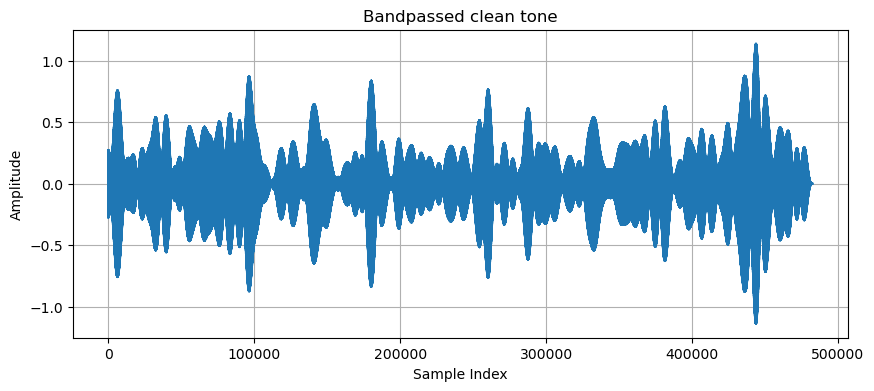

In [8]:
bandpass_noise = bandpass_filter(down_sig_noise, 49.9, 50.1, 1000, 4)
n_noise = np.arange(len(bandpass_noise))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, bandpass_noise)
plt.title('Bandpassed noisy tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

bandpass_clean = bandpass_filter(down_sig_clean, 49.9, 50.1, 1000, 4)
n_clean = np.arange(len(bandpass_clean))

plt.figure(figsize=(10, 4))
plt.plot(n_clean, bandpass_clean)
plt.title('Bandpassed clean tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig("Bandpassed_clean_signal")
plt.show()


50.019558197199366
50.01966652562666
50.019775202352385
50.01988422401079
50.01999358722425
50.02010328860168
50.02021332473695
50.02032369220725
50.020434387571726
50.020545407369795
50.020656748119734
50.02311511858388
50.02321419467464
50.02331360697061
50.02341335105583
50.023513422504124
50.02361381687767
50.023714529725396
50.02381555658139
50.02391689296356
50.024018534372
50.02412047628761
50.024222714170676
50.024325243459444
50.02442805956872
50.02453115788853
50.02463453378273
50.024738182587704
50.02484209961109
50.024946280130486
50.02505071939215
50.02515541260981
50.02526035496345
50.02536554159809
50.02547096762255
50.025576628108475
50.025682518089
50.0257886325578
50.025894966467895
50.02600151473071
50.0261082722148
50.02621523374518
50.02632239410199
50.02642974801974
50.02653729018623
50.02664501524172
50.026752917778026
50.026860992337504
50.02696923341239
50.02707763544385
50.02718619282117
50.0272948998811
50.027403750906934
50.02751274012797
50.02762186171857
5

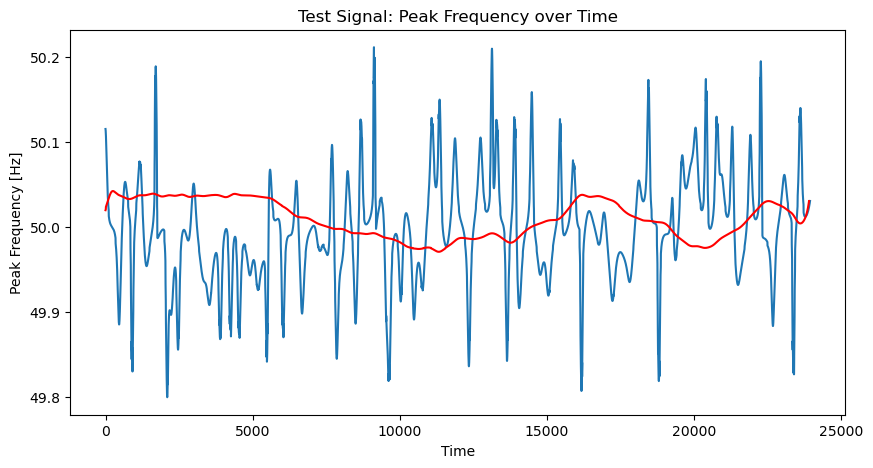

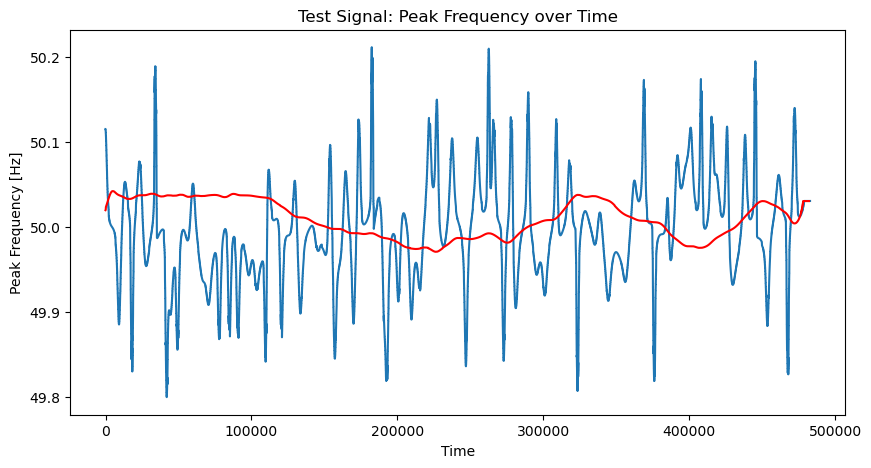

In [21]:
# Reference signal
ref_fs, down_sig_ref = wavfile.read('Wuhan_ENF_data/down_001_ref.wav')
bandpass_ref = bandpass_filter(down_sig_ref, 49.9, 50.1, 1000, 4)
clean_fs = 1000

peak_freqs_ref = segmented_freq_estimation_DFT1(bandpass_ref, clean_fs, num_cycles = 200, N_DFT= 20_000, nominal_enf=50)

#peak_freqs = freq_estimation(bandpass_clean, clean_fs)
peak_freqs_band = segmented_freq_estimation_DFT1(bandpass_clean, clean_fs, num_cycles = 200, N_DFT= 20_000, nominal_enf=50)


# Plot the peak frequency extracted from the test signal
plt.figure(figsize=(10,5))
plt.plot(peak_freqs_band)
plt.plot(peak_freqs_ref, color='red')
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time')
plt.title("Test Signal: Peak Frequency over Time")
plt.show()


clean_sig_len = int(len(bandpass_clean)/len(peak_freqs_band))
estimated_clean_freqs = np.ones(len(bandpass_clean))
for i in range(len(peak_freqs_band)):
    estimated_clean_freqs[i*clean_sig_len:(2*clean_sig_len + 2*i*clean_sig_len)] = peak_freqs_band[i]

ref_sig_len = int(len(bandpass_ref)/len(peak_freqs_ref))
estimated_ref_freqs = np.ones(len(bandpass_ref))
for i in range(len(peak_freqs_ref)):
    estimated_ref_freqs[i*ref_sig_len:(2*clean_sig_len + 2*i*ref_sig_len)] = peak_freqs_ref[i]
    
    
# Plot the peak frequency extracted from the test signal
plt.figure(figsize=(10,5))
plt.plot(estimated_clean_freqs)
plt.plot(estimated_ref_freqs, color='red')
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time')
plt.title("Test Signal: Peak Frequency over Time")
plt.show()



In [ ]:
tau = int(750)
estimated_enf = 50
I = 3
epsilon = 1e-7
fs = 1000
sig = bandpass_clean 
RFA(sig, fs, tau, epsilon, I, estimated_enf)

In [ ]:
fs =1000
f0 = 50
phi0 = np.pi/4
M = 1000
t,x = generate_s_tone(fs, f0, phi0, M)
I = 3
epsilon = 1e-20
tau = int(750)

rfa_test = RFA(x, fs, tau, epsilon, I, f0)

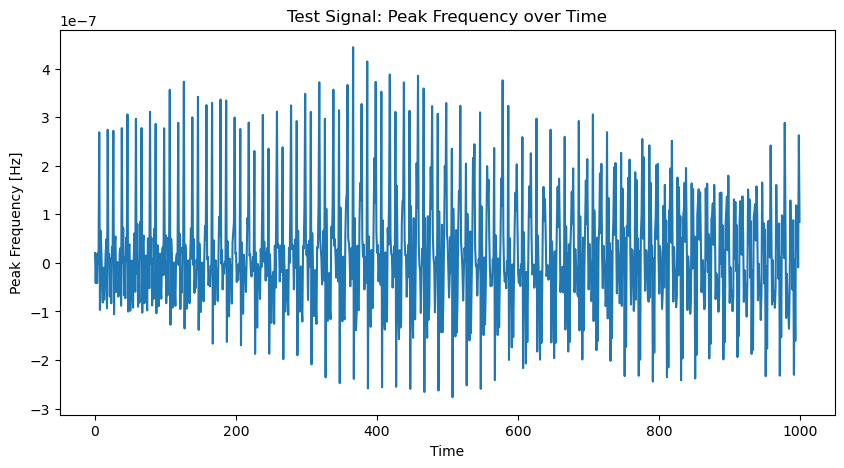

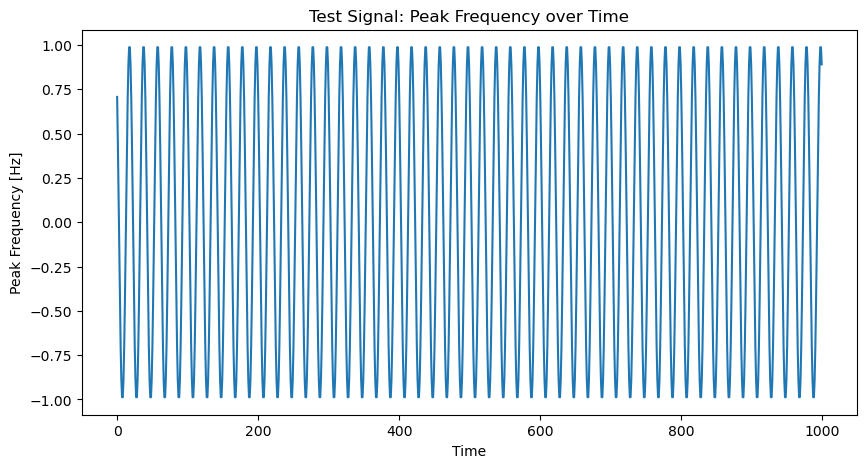

In [34]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(rfa_test)),rfa_test)
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time')
plt.title("Test Signal: Peak Frequency over Time")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(np.arange(len(x)),x)
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time')
plt.title("Test Signal: Peak Frequency over Time")
plt.show()

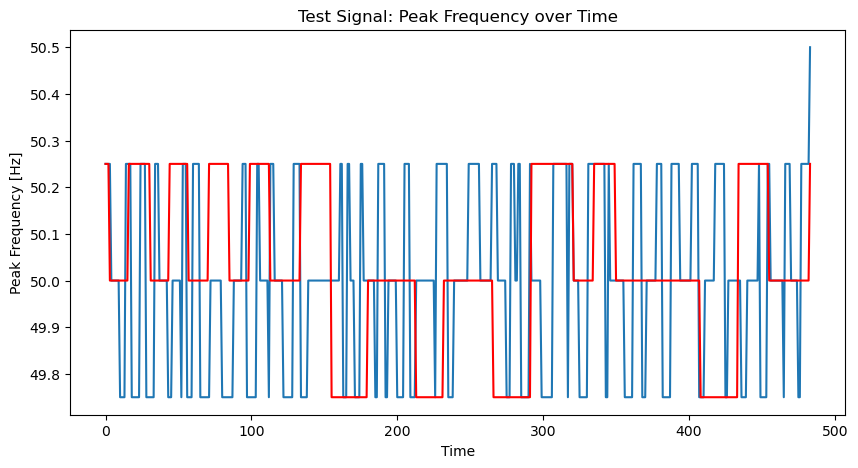

482003


In [16]:
# Reference signal
fs = 1000
ref_fs, down_sig_ref = wavfile.read('Wuhan_ENF_data/down_001_ref.wav')
bandpass_ref = bandpass_filter(down_sig_ref, 49.5, 50.5, 1000, 4)
window = 'hann'
nperseg = 4*fs

f_ref, t_ref, Zxx_ref = signal.stft(bandpass_ref, fs=ref_fs, window=window, nperseg=nperseg, noverlap = 3*fs)
f_band, t_band, Zxx_band = signal.stft(bandpass_clean, fs=clean_fs, window=window, nperseg=nperseg, noverlap = 3*fs)

peak_freqs_ref = [f_ref[idx] for k in range(len(t_ref)) if (idx := np.argmax(Zxx_ref[:,k]))]
peak_freqs_band = [f_band[idx] for k in range(len(t_band)) if (idx := np.argmax(Zxx_band[:,k]))]

# Plot the peak frequency extracted from the test signal
plt.figure(figsize=(10,5))
plt.plot(peak_freqs_band)
plt.plot(np.arange(len(peak_freqs_ref)),peak_freqs_ref, color='red')
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time')
plt.title("Test Signal: Peak Frequency over Time")
plt.show()
print(len(bandpass_ref))

In [18]:
alpha = 5000 # moderate bandwidth constraint
#alpha = 1/4 * clean_fs * np.max(bandpass_clean)
tau = 0 
n_mode = 1
DC = 0  # no DC part imposed  
tol = 1e-7
u_clean, u_hat_clean, omega_clean = VariationalModeDecomposition(bandpass_clean, alpha, tau, n_mode, DC, tol)

49.96433512907152
49.96440263177606
49.964470234159336
49.964537934545305
49.96460573363173
49.96467363255263
49.96474163254407
49.9648097348868
49.96487794089664
49.96494625192321
49.96501466934966
49.965083194593234
49.96515182910527
49.96522057437173
49.96528943191332
49.96535840328578
49.96542749008026
49.965496693923484
49.96556601647803
49.9656354594427
49.965705024552584
49.96577471357953
49.965844528332184
49.96591447065632
49.96598454243514
49.96605474558933
49.966125082077426
49.96619555389597
49.966266163079766
49.96633691170191
49.966407801874176
49.9664788357471
49.966550015510165
49.96662134339195
49.96669282166029
49.96676445262248
49.966836238625255
49.966908182055114
49.966980285338195
49.96705255094064
49.9671249813685
49.967197579167745
49.96727034692459
49.967343287265344
49.96741640285647
49.96748969640463
49.96756317065667
49.967636828399684
49.967710672460925
49.96778470570772
49.96785893104754
49.96793335142779
49.9680079698358
49.96808278929869
49.9681578128832

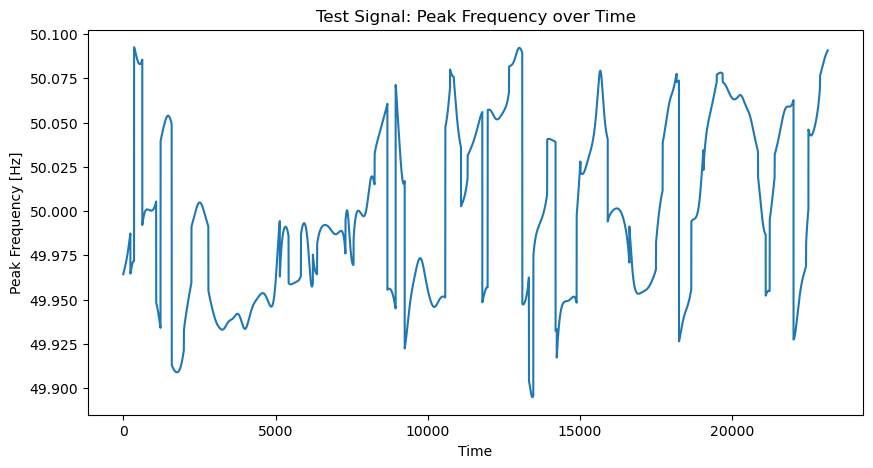

In [20]:
peak_freqs_vmd = segmented_freq_estimation_DFT1(u_clean[0], clean_fs, num_cycles = 1000, N_DFT= 20_000, nominal_enf=50)

# Plot the peak frequency extracted from the test signal
plt.figure(figsize=(10,5))
plt.plot(peak_freqs_vmd)
#plt.plot(peak_freqs_ref, color='red')
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time')
plt.title("Test Signal: Peak Frequency over Time")
plt.show()


In [ ]:
peak_freqs = segmented_freq_estimation_DFT1(bandpass_noise, noise_fs, num_cycles = 1000, N_DFT= 20_000, nominal_enf=50)

# Plot the peak frequency extracted from the test signal
plt.figure(figsize=(10,5))
plt.plot(peak_freqs)
plt.plot(peak_freqs_ref, color='red')
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Test Signal: Peak Frequency over Time")
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

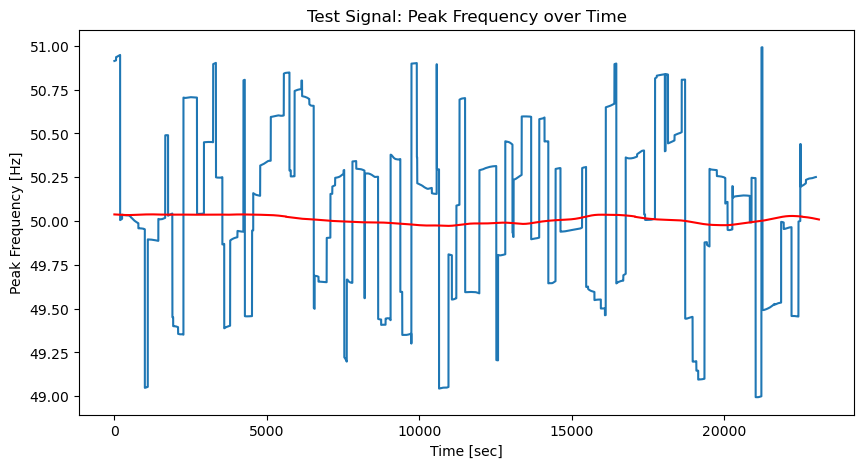

In [40]:
alpha = 2000 # moderate bandwidth constraint
tau = 
n_mode = 1
DC = 0  # no DC part imposed  
tol = 1e-7

u_noise, u_hat_noise, omega_noise = VariationalModeDecomposition(bandpass_noise, alpha, tau, n_mode, DC, tol)
freqs_vmd_noise = segmented_freq_estimation_DFT1(u_noise[0], clean_fs, num_cycles = 1000, N_DFT= 20_000, nominal_enf=50)

# Plot the peak frequency extracted from the test signal
plt.figure(figsize=(10,5))
plt.plot(freqs_vmd_noise)
plt.plot(peak_freqs_ref, color='red')
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Test Signal: Peak Frequency over Time")
plt.plot

In [42]:
dir = 'Talkbank_data'
rawFile_name, downFile_name = list_files_in_directory(dir)
for i in range(len(rawFile_name)):
    downsampling(rawFile_name[i], downFile_name[i], fs_down = 1000)

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 12.3.0 (conda-forge gcc 12.3.0-13)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1719926049773/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-lib

1000
[  6.  -21.5 -34.5 ...  -5.   -4.   -5.5]


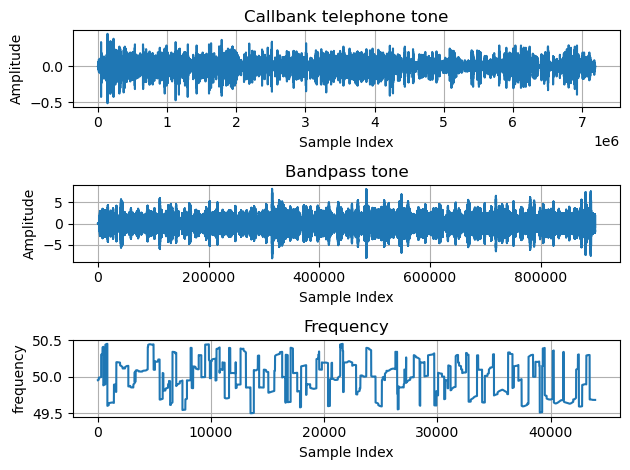

In [46]:
###.........................Talk_bank......................###

noise_data, noise_fs = sf.read('Talkbank_data/1082.wav')
noise_data = np.mean(noise_data, axis=1)
n_noise = np.arange(len(noise_data))

plt.figure()
plt.subplot(3,1,1)
plt.plot(n_noise, noise_data)
plt.title('Callbank telephone tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()


talkbank_fs, down_sig_talkbank = wavfile.read('Talkbank_data/down_1082.wav')
down_sig_talkbank = np.mean(down_sig_talkbank, axis=1)
bandpass_talkbank = bandpass_filter(down_sig_talkbank, 49.5, 50.5, talkbank_fs, 4)
n_talkbank = np.arange(len(bandpass_talkbank))

print(talkbank_fs)
print(down_sig_talkbank)

plt.subplot(3,1,2)
plt.plot(n_talkbank, bandpass_talkbank)
plt.title('Bandpass tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

inst_freq_talkbank = segmented_freq_estimation_DFT1(bandpass_talkbank, talkbank_fs, num_cycles = 1000, N_DFT= 20_000, nominal_enf=50)

plt.subplot(3,1,3)
plt.plot(inst_freq_talkbank)
plt.title('Frequency')
plt.xlabel('Sample Index')
plt.ylabel('frequency')
plt.grid()
plt.tight_layout()


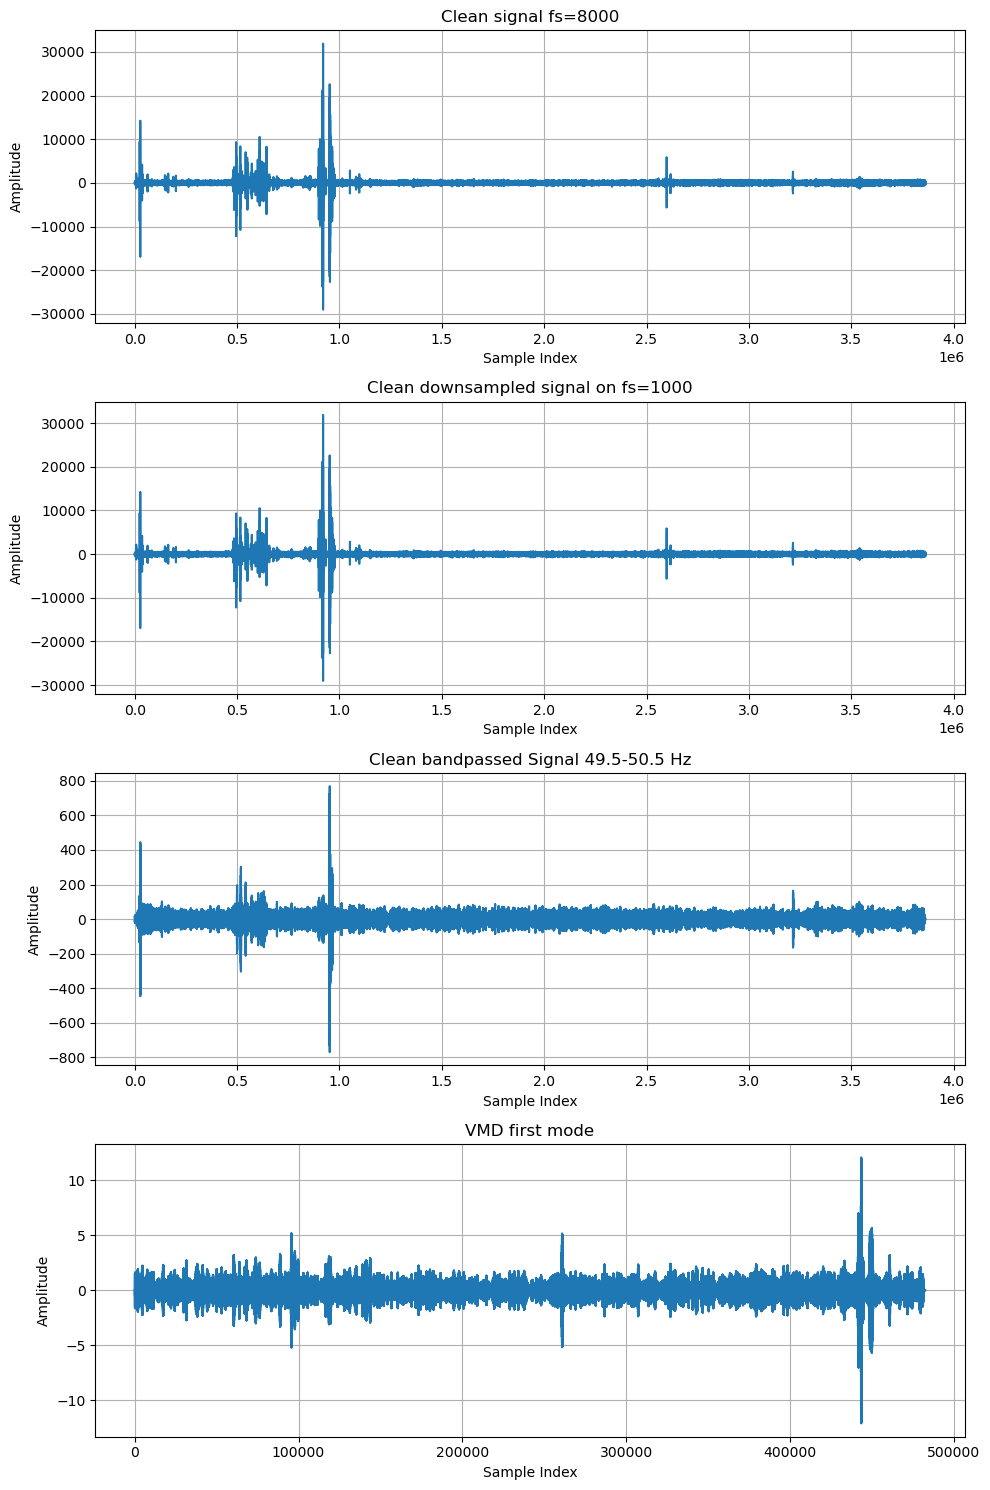

In [13]:
### Clean plot
_, clean_data = wavfile.read('Wuhan_ENF_data/001.wav')
n_clean = np.arange(len(clean_data ))

clean_fs, downsampled_clean = wavfile.read('Wuhan_ENF_data/001.wav')
n_clean_down = np.arange(len(downsampled_clean))

bandpass_clean = bandpass_filter(downsampled_clean, 49.5, 50.5, 1000, 4)
n_clean_band = np.arange(len(bandpass_clean))

vmd = u[0]
n_vmd = np.arange(len(u[0]))

plt.figure(figsize=(10, 15))

plt.subplot(4,1,1)
plt.plot(n_clean, clean_data)
plt.title('Clean signal fs=8000')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

plt.subplot(4,1,2)
plt.plot(n_clean_down, downsampled_clean)
plt.title('Clean downsampled signal on fs=1000')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

plt.subplot(4,1,3)
plt.plot(n_clean_band , bandpass_clean)
plt.title('Clean bandpassed Signal 49.5-50.5 Hz')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

plt.subplot(4,1,4)
plt.plot(n_vmd, vmd)
plt.title('VMD first mode')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
#plt.savefig("clean_signal_amplitude")

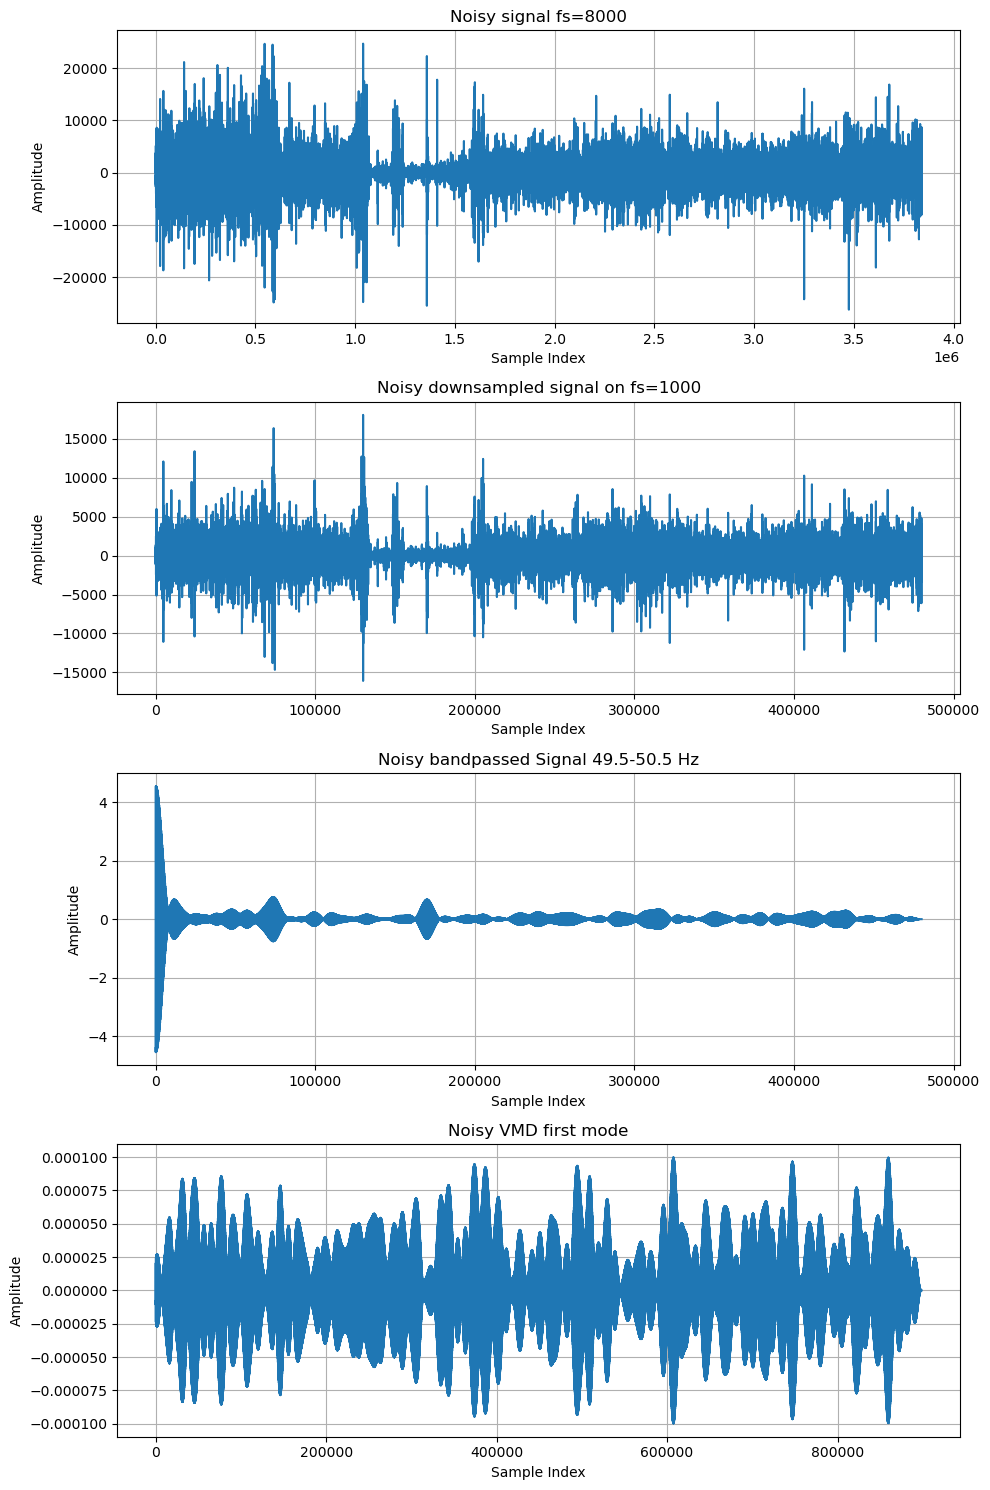

In [91]:
### Clean plot
clean_fs, clean_data = wavfile.read('Wuhan_ENF_data/01.wav')
n_clean = np.arange(len(clean_data))

downsampled_clean = downsampling(clean_data, clean_fs, f_ds=1000)
n_clean_down = np.arange(len(downsampled_clean))

bandpass_clean = bandpass_filter(downsampled_clean, 49.5, 50.5, 8000, 3)
n_clean_band = np.arange(len(bandpass_clean))

vmd = u_noise[0]
n_vmd = np.arange(len(u_noise[0]))

plt.figure(figsize=(10, 15))

plt.subplot(4,1,1)
plt.plot(n_clean, clean_data)
plt.title('Noisy signal fs=8000')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

plt.subplot(4,1,2)
plt.plot(n_clean_down, downsampled_clean)
plt.title('Noisy downsampled signal on fs=1000')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

plt.subplot(4,1,3)
plt.plot(n_clean_band , bandpass_clean)
plt.title('Noisy bandpassed Signal 49.5-50.5 Hz')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()

plt.subplot(4,1,4)
plt.plot(n_vmd, vmd)
plt.title('Noisy VMD first mode')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
#plt.savefig("noisy_signal_amplitude")

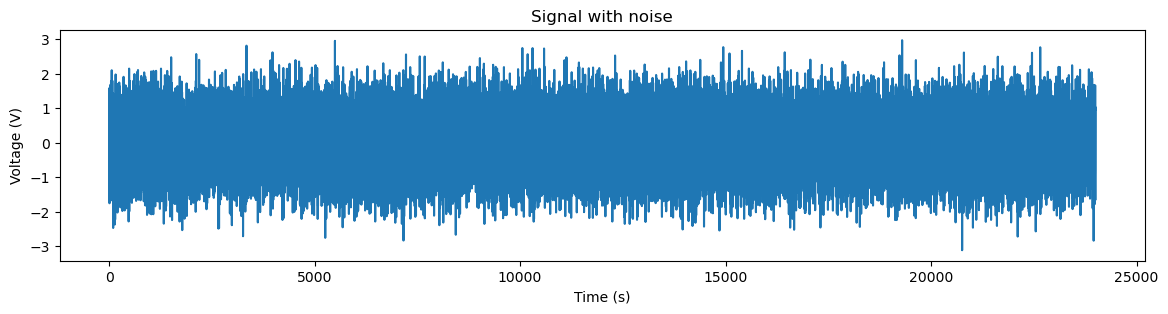

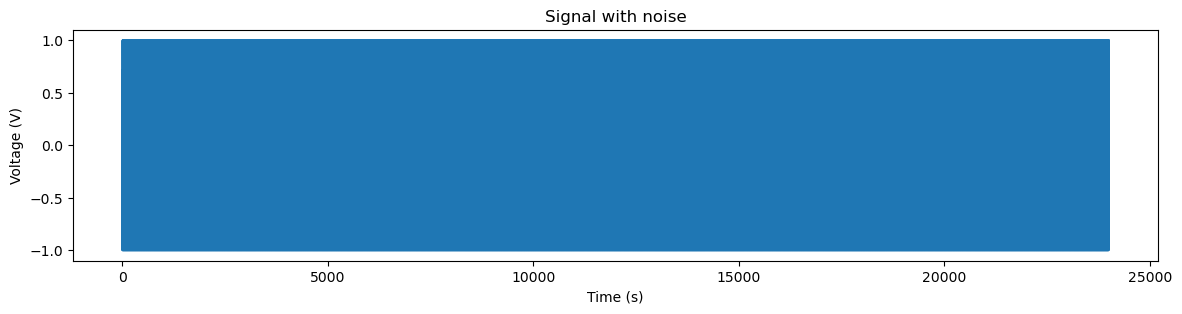

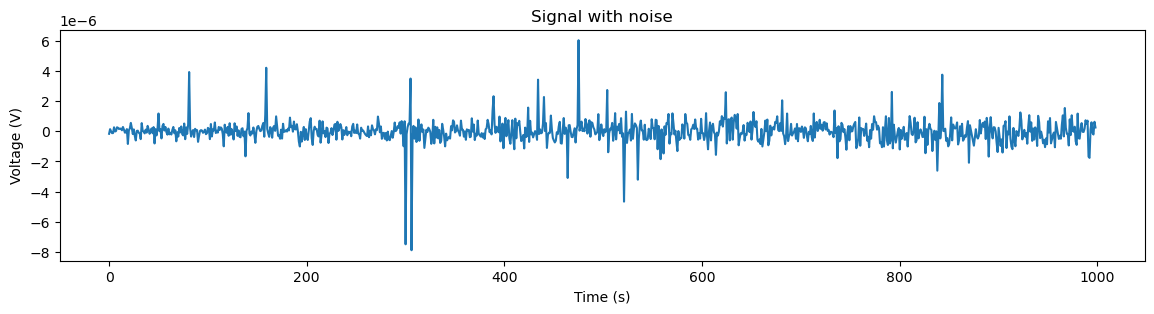

In [62]:
Fs = 400
f0 = 50
phi0 = np.pi/4
M = 60*Fs

n, s_n = generate_s_tone(Fs, f0, phi0, M) # Creating signal
s_watts = s_n** 2

# Adding noise using target SNR
# Set a target SNR
target_snr_db = 2

# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(s_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)

# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)

# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(s_watts))

# Noise up the original signal
s_n_noised = s_n + noise_volts

# Plot signal with noise
plt.figure(figsize=(14, 3))
plt.plot(s_n_noised)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

plt.figure(figsize=(14, 3))
plt.plot(s_n)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

plt.figure(figsize=(14, 3))
plt.plot(rfa)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

In [49]:
###...........................RFA................................###
def z_SFM(sig, n , fs, alpha, tau):
    sum_sig = 0
    sig_padded = np.pad(sig, (tau, tau), 'constant')

    # n+tau
    for i in range(n+tau+1):
        sum_sig += sig_padded[i]
    z = cmath.exp(1j*2*math.pi*(1/fs)*alpha*sum_sig)
    return z


def z_SFM_complex(sig, n, fs, alpha, tau):
    sum_sig = 0
    sig_padded = np.pad(sig, (tau, tau), 'constant')

    # n-tau
    for i in range(n-tau+1):
        sum_sig += sig_padded[i]
    z = cmath.exp(-1j*2*math.pi*(1/fs)*alpha*sum_sig)
    return z


def kernel_function(sig, f, n, fs, alpha, tau):
    tau_dash = int(tau + np.round(fs/(4*f)))
    auto_corr = z_SFM(sig, n, fs, alpha, tau) * z_SFM_complex(sig, n, fs, alpha, tau)
    auto_corr_dash = z_SFM(sig, n, fs, alpha, tau_dash) * z_SFM_complex(sig, n, fs, alpha, tau_dash)
    
    Kernel = (auto_corr**((1/fs)*f*tau*math.pi*np.sin(2*math.pi*(1/fs)*f*tau)) 
              * auto_corr_dash**((1/fs)*f*tau*math.pi*np.cos(2*math.pi*(1/fs)*f*tau)))
    return Kernel

def segmented_freq_estimation_hilbert(s_in, f_s, num_cycles, nominal_enf):
    step_size = int(f_s // nominal_enf)  # samples per nominal enf cycle

    num_blocks = len(s_in) // step_size - (num_cycles - 1)

    segments = [s_in[i * step_size : (i + num_cycles) * step_size] for i in range(num_blocks)]

    freqs = []
    for i in range(len(segments)):
        freq = hilbert_instantaneous_freq(segments[i],f_s)
        freq = np.mean(freq)
        freqs.append(freq)

    freqs = np.array(freqs)
    
    return freqs

def RFA(sig, fs, tau, epsilon, I, estimated_enf):
    print("test")
    # Initialise
    k = 1
    Nx = len(sig)
    alpha = 1/4 * fs/np.max(sig)
    f_start = estimated_enf * np.ones(Nx)
    
    while k <= I:
        denoised_sig = []

        for n in tqdm(range(0, Nx-1)):
            f = f_start[n]
            phase_of_kernel = 0
            
            for m in range(1,tau+1):
                phase_of_kernel += np.angle(kernel_function(sig, f, n, fs, alpha, m))

            denoised_sig.append(phase_of_kernel/((tau+1)*tau*math.pi*alpha))
        print(denoised_sig)
        peak_freqs = segmented_freq_estimation_hilbert(denoised_sig, fs, num_cycles = 10, nominal_enf=estimated_enf)
        print(peak_freqs)
        sig_len = int(len(sig)/len(peak_freqs))
        new_freqs = np.ones(len(denoised_sig))

        for l in range(len(peak_freqs)):
            new_freqs[l*sig_len:(2*sig_len + 2*l*sig_len)] = peak_freqs[l]

        f = f_start
        numerator = 0
        denominator = 0
        

        for s in range(len(new_freqs)):
            numerator += (new_freqs[s]-f[s])**2
            denominator += (f[s])**2
        
        if numerator/denominator <= epsilon:
            return denoised_sig

        f_start = new_freqs
        sig = denoised_sig
        denoised_signal = denoised_sig
        k+=1
    return denoised_signal


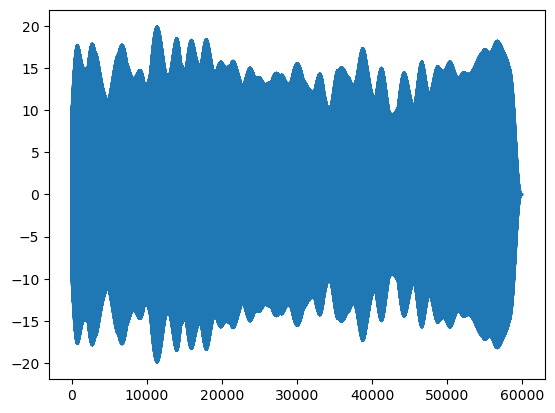

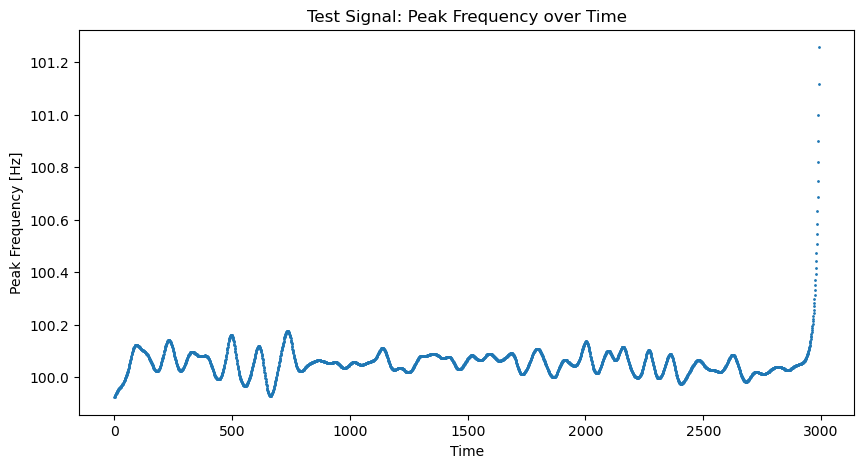

In [2]:
# 1min Audio files noisy data
input_dir = '/home/leo_dacasi/Dokumente/summerofcode/Enfify_Data_Synced/interim/ENF-WHU-Dataset/1min_noise/1min_noisy_down'
output_dir = '/home/leo_dacasi/Dokumente/summerofcode/Enfify_Data_Synced/interim/ENF-WHU-Dataset/1min_noise/1min_noisy_down_cut'

file_list_uncut = os.listdir(input_dir)
fs = 1000

down_sig = []

for wav_file in file_list_uncut:
    file_path = os.path.join(input_dir, wav_file)
    fs, signal = wavfile.read(file_path)
    bandpass_sig = bandpass_filter(signal, 99.5, 100.5, 1000, 4)
    down_sig.append(bandpass_sig)

plt.plot(down_sig[0])
plt.show()

peak_freqs = segmented_freq_estimation_DFT1(down_sig[0], 1000, num_cycles = 10, N_DFT= 20_000, nominal_enf=50)

# Plot the peak frequency extracted from the test signal
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(peak_freqs)),peak_freqs, s=1)
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time')
plt.title("Test Signal: Peak Frequency over Time")
plt.show()

In [3]:
alpha = 5000 # moderate bandwidth constraint
tau = 0 
n_mode = 1
DC = 0  # no DC part imposed  
tol = 1e-7
u_clean, u_hat_clean, omega_clean = VariationalModeDecomposition(down_sig[0], alpha, tau, n_mode, DC, tol)

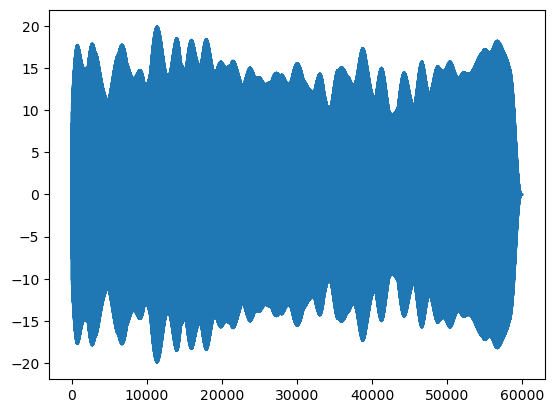

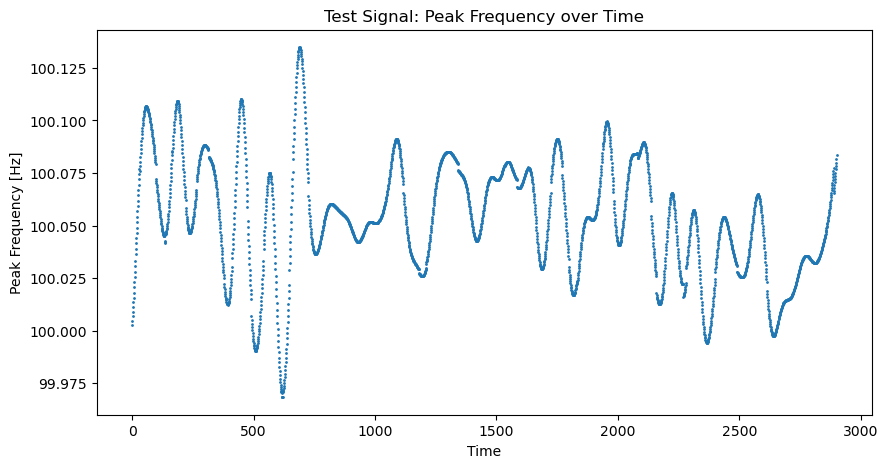

In [4]:
plt.plot(u_clean[0])
plt.show
NUM_CYCLES = 10
peak_freqs_vmd = segmented_freq_estimation_DFT1(u_clean[0], 1000, num_cycles = 100, N_DFT= 20_000, nominal_enf=50)
#peak_freqs_vmd = segmented_phase_estimation_hilbert(u_clean[0], 1000, NUM_CYCLES, 50)

# Plot the peak frequency extracted from the test signal
plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(peak_freqs_vmd)), peak_freqs_vmd, s=1)
plt.ylabel('Peak Frequency [Hz]')
plt.xlabel('Time')
plt.title("Test Signal: Peak Frequency over Time")
plt.show()

In [1]:
print("\033[1mDas ist fettgedruckter Text\033[0m")

Das ist fettgedruckter Text
